In [1]:
import sys
import os

if 'root_dir' not in globals():
    # rootディレクトリへのパスを設定
    root_dir = os.path.abspath(os.path.join(os.getcwd(), '../'))
    os.chdir(root_dir)


In [2]:
import pandas as pd

from my_codes.database_setting import Engine
from my_codes.database_setting import Base

from my_codes.notes_database import Notes

from sqlalchemy.orm import sessionmaker

Session = sessionmaker(bind=Engine)
session = Session()

In [3]:
# ORMを使って特定のカラムを取得
result = session.query(Notes.key, Notes.tokenized_body).all()
session.close()
# リストをDataFrameに変換
data = pd.DataFrame(result, columns=['key','tokenized_body'])

In [21]:
data = data.sample(n=1000, random_state=42,replace=True)

In [23]:
# データの形を確認
print(data.head())
print(data.shape)


              key                                     tokenized_body
51  nebd1252b52ad  [感じ, 中学, 太, 指摘, セーラー, スク水, 大人, 女性, 着る, サイズ, 小さ...
92  nfb9c01bf7962  [早朝, 覚め, よく, 眠れ, する, 昨日, 映画, 行こう, 迷っ, 映画, あまり,...
14  nefe1408e5e58  [早朝, 覚め, 禁酒, よく, 夜中, 覚める, 時間, 単位, 大半, トイレ, 昨日,...
71  ne4cc462d711a  [早朝, 覚め, 身体, ダルい, 昨日, 内科, 行き, 検査, 陰性, どう, 体調, ...
60  n023301bbffb2  [早朝, 覚め, まあ, 眠れ, 昨日, 皮膚, 行っ, アトピー, 症状, かなり, 良い...
(1000, 2)


In [27]:
type(data.tokenized_body[0])

pandas.core.series.Series

In [25]:
import ast  # For converting string representation of lists to actual lists

# Convert the string representation of lists in 'tokenized_body' to actual lists
data['tokenized_body'] = data['tokenized_body'].apply(ast.literal_eval)

# Display the transformed data to ensure correct conversion
data.head()


ValueError: malformed node or string: ['感じ', '中学', '太', '指摘', 'セーラー', 'スク水', '大人', '女性', '着る', 'サイズ', '小さ', 'すぎる', '言い', '今度', '書く', '新作', '編集', '送ら', 'てこ', 'エロ', 'マンガ', 'モデル', 'そう', '洗い', '終え', '航', '太', 'エプロン', '脱ぎ', '振り返る', '赤く', 'まま', '黙っ', '見つめる', '沈黙', '続く', '気まずい', '一体', '考え', 'いる', 'おっ', 'カノ', 'セーラー', '無理', '編集', '依頼', 'ロリ', 'もの', 'つまり', '成年', 'ヒロイン', '良い', 'おっ', '周り', '女子', '中学', 'いる', '困っ', 'いる', '勝手', '送ら', '今度', '連絡', '取っ', 'ちゃんと', '返却', 'する', 'そう', '言っ', 'カーテン', 'レール', 'セーラー', '取ろう', '瞬間', '太', '叫ぶ', '待っ', '振り返る', '航', '太', '立っ', 'どう', '緊張', 'いる', '震わせ', 'いる', '着', 'どう', '思わ', '疑っ', 'ツンツン', '航', '太', '着る', 'おっ', '元カノ', 'モデル', '今回', '良く', 'ない', 'ちょっと', '待て', '太', '女装', '趣味', 'ある', '航', '太', 'まじまじ', '見つめ', 'いる', '察し', '怒り', '始める', '趣味', 'ない', 'どう', 'おっ', '困っ', '見え', '仲良く', 'くれる', '良い', '友達', '困っ', '助け', '思う', '普通', '意見', '否定', '肯定', '出来', '友達', 'ため', 'する', '野郎', 'こと', 'ない', '最近', '若い', '普通', 'こと', 'おっ', 'ちょっと', '着替え', 'くる', '待っ', 'そう', '言う', '太', 'セーラー', '持っ', '脱衣', '入る', '脱衣', '言っ', '薄い', 'カーテン', '仕切り', '作っ', 'もの', '我が家', '玄関', '開けれ', '右手', '脱衣', '洗面', '元々', '学生', '時代', '引っ越し', 'なかっ', '付き合っ', 'いる', '丸見え', '隠し', '欲しい', '設置', 'もの', 'もし', 'カーテン', '設置', '今ごろ', '丸見え', '考え', 'いる', '相手', '男の子', '着替え', 'いる', 'ところ', 'バカ', 'ちょっと', '待て', '考え', '平気', 'ひとり', '考え', 'いる', 'カーテン', '開い', 'しまう', 'どう', 'やっぱり', 'おかしい', '赤く', '見つめる', '少年', '完璧', '少女', 'ちょっと', '短い', '女の子', '感じ', '紺色', 'セーラー', '赤い', 'スカーフ', 'スカート', '膝下', 'ある', '魅力', '感じる', '言葉', '失っ', 'おっ', 'どう', '距離', '詰め', '睨む', '太', '身長', 'ある', 'どう', '上目', 'なる', 'ブラウン', '吸い込ま', '思わ', '生唾', '飲み込む', '考え', 'いる', '太', '男の子', 'もう', '沙汰', '感覚', 'おかしく', 'なっ', 'いる', 'ところ', 'どう', 'おっ', 'こと', '構い', 'なし', '覗き込む', '太', 'すごく', '可愛い', 'つい', '見惚れ', 'しまい', '本音', 'ポロリ', 'こぼれる', '回答', '太', '驚き', '固まっ', 'しまう', 'ヤバい', 'まま', '思わ', 'そう', 'いう', 'なく', '久し', 'セーラー', '可愛い', 'かなり', '無理', 'ある', '言い訳', '太', '感じ取っ', '慌て', '合わせる', 'そう', 'おっ', 'もう', '３０', 'なる', 'セーラー', '見る', '機会', 'ない', '嬉しい', 'いう', 'しばらく', 'いう', '墓穴', '掘っ', 'しまっ']

In [ ]:
from numpy import triu



In [ ]:
from gensim import corpora, models
# !pip install scipy==1.12
# 最新のscipyのバージョンだとtriuがうまくダウンロードできないので、バージョンを指定してインストールする

# Prepare the list of tokens for gensim
texts = data['tokenized_body'].tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Filter out words that occur less than 20 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Convert document into the bag-of-words (BoW) format = list of (token_id, token_count)
corpus = [dictionary.doc2bow(text) for text in texts]

# Set up the LDA model
lda_model = models.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=10)

# Show the topics with their terms
topics = lda_model.print_topics(num_words=10)
topics


[(0,
  '0.081*"飲ん" + 0.072*"しまう" + 0.054*"よく" + 0.053*"禁酒" + 0.052*"いい" + 0.041*"最近" + 0.037*"どう" + 0.037*"食べ" + 0.036*"しまっ" + 0.033*"メンクリ"'),
 (1,
  '0.139*"こと" + 0.085*"そう" + 0.060*"良い" + 0.052*"もう" + 0.051*"いい" + 0.049*"なっ" + 0.044*"子供" + 0.041*"しまっ" + 0.034*"時間" + 0.033*"しまう"'),
 (2,
  '0.141*"予定" + 0.064*"行っ" + 0.061*"最近" + 0.057*"久し" + 0.057*"もの" + 0.054*"時間" + 0.053*"散歩" + 0.052*"こと" + 0.049*"眠れ" + 0.049*"メンクリ"'),
 (3,
  '0.117*"少し" + 0.085*"禁酒" + 0.074*"出" + 0.071*"身体" + 0.067*"しまっ" + 0.063*"映画" + 0.055*"プレイ" + 0.050*"飲ん" + 0.045*"夕方" + 0.038*"考え"'),
 (4,
  '0.088*"いい" + 0.078*"しまっ" + 0.077*"出" + 0.069*"まだ" + 0.065*"時間" + 0.062*"ちょっと" + 0.057*"そう" + 0.052*"編集" + 0.047*"久し" + 0.046*"書い"'),
 (5,
  '0.097*"あと" + 0.065*"プレイ" + 0.062*"少し" + 0.060*"散歩" + 0.050*"映画" + 0.041*"帰宅" + 0.040*"食べ" + 0.038*"予定" + 0.036*"なっ" + 0.033*"早朝"'),
 (6,
  '0.073*"少し" + 0.056*"プレイ" + 0.056*"禁酒" + 0.051*"あと" + 0.047*"もの" + 0.042*"どう" + 0.038*"終わっ" + 0.038*"帰宅" + 0.038*"なっ" + 0.037*"食べ"'),
 (7,
  '0.218

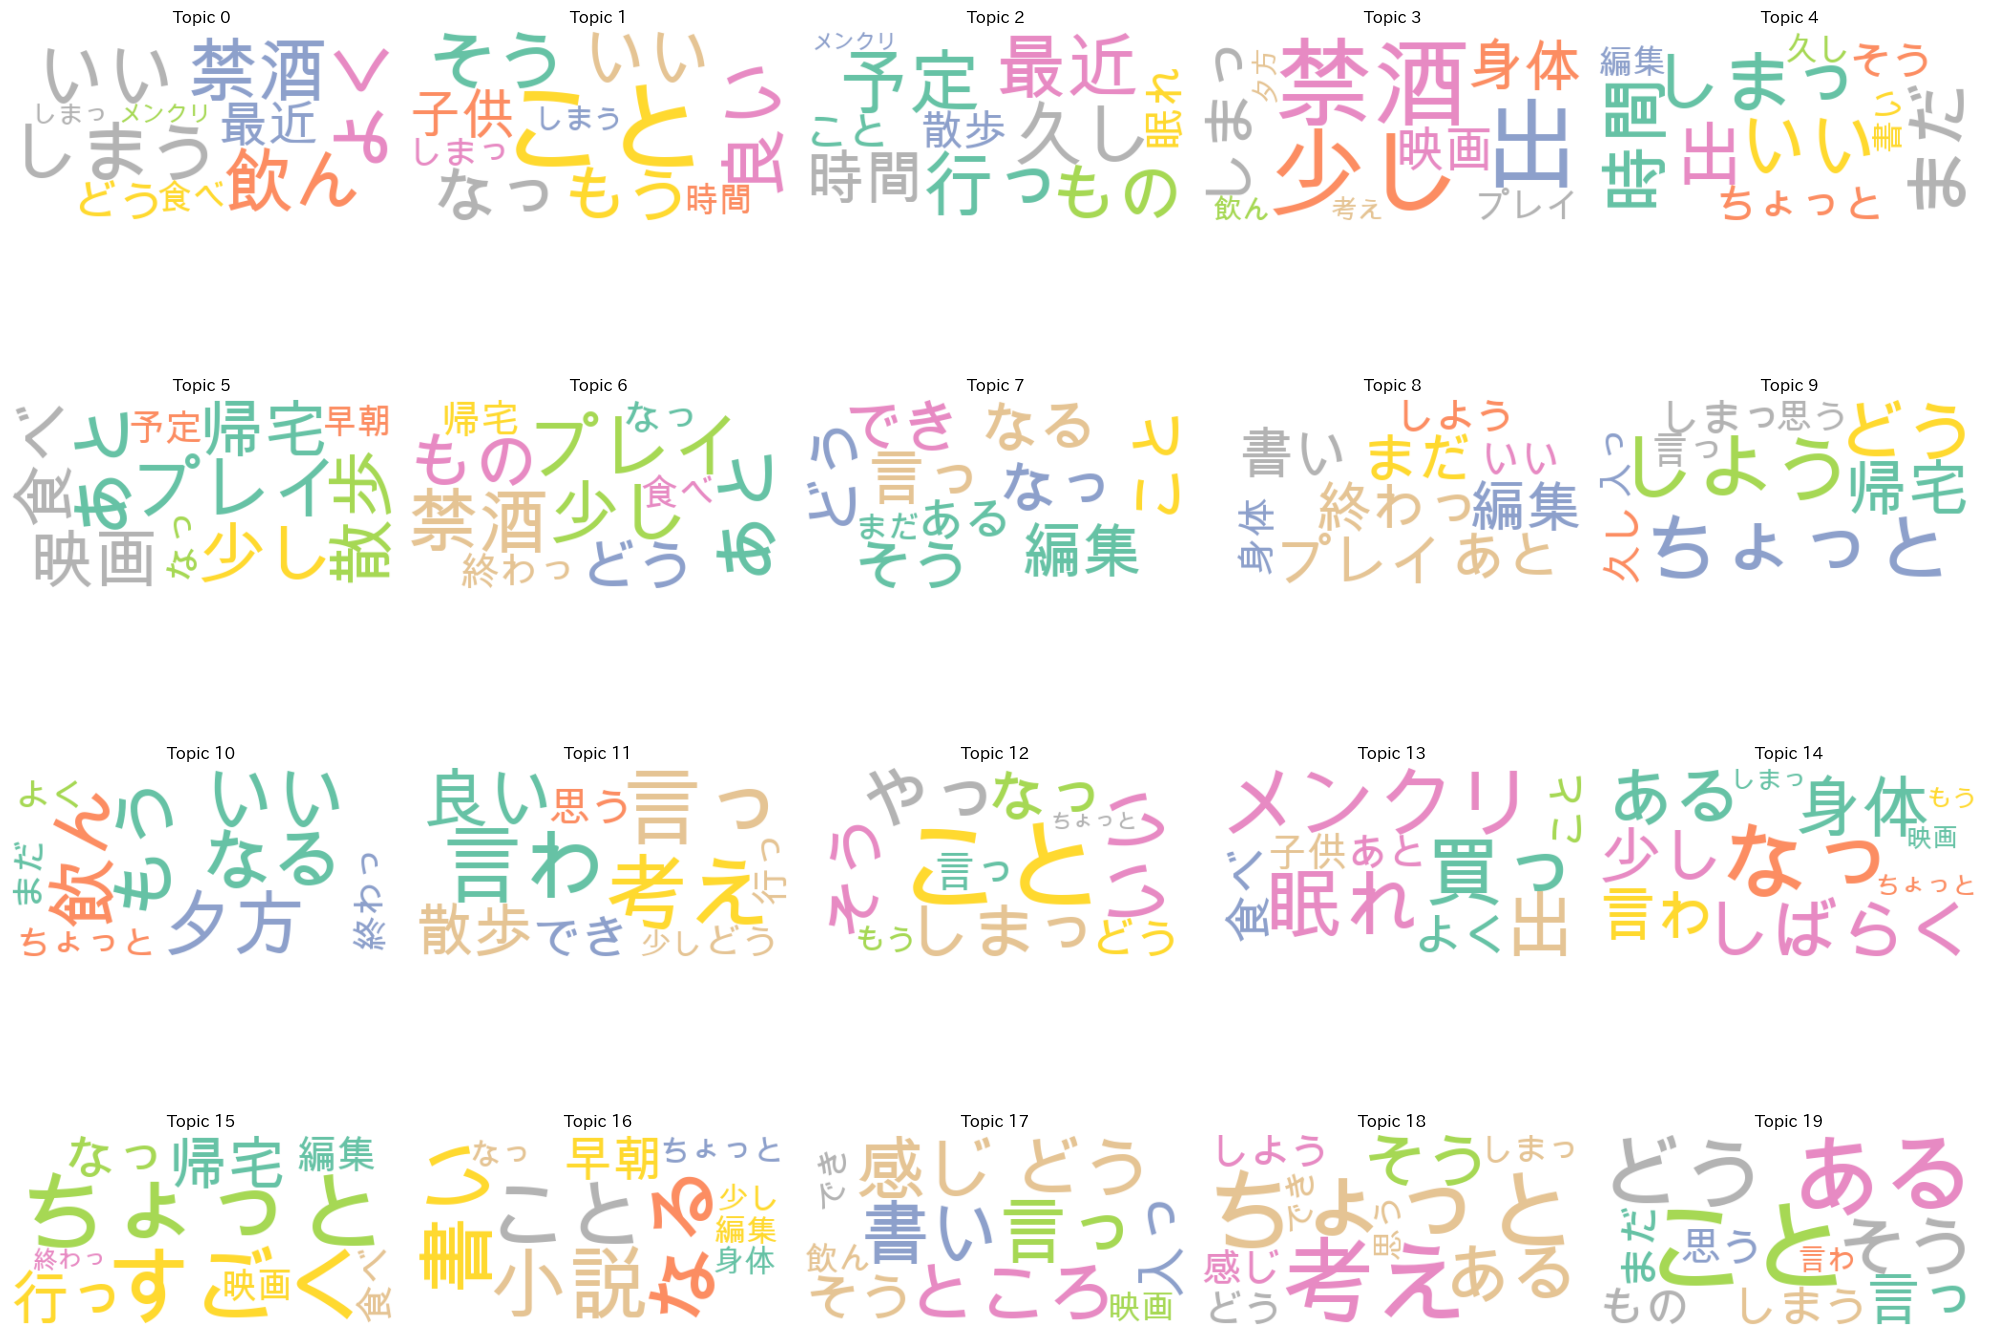

In [ ]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# 日本語フォントのパスを指定
font_path = '/Library/Fonts/Arial Unicode.ttf'

# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Iterate over the topics and plot word clouds in subplots
for i, topic in enumerate(topics):
    # Concatenate the words in the topic
    topic_words = ' '.join(topic[1].split('*'))
    
    # Generate the word cloud
    wordcloud = WordCloud(font_path=font_path, width=400, height=200, colormap='Set2', background_color='white').generate(topic_words)
    
    # Plot the word cloud in the corresponding subplot
    ax = axes[i // 5, i % 5]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {topic[0]}')
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined image of word clouds
plt.show()




In [ ]:
similarity_matrix = np.zeros((len(topics), len(topics)))
for i in range(len(topics)):
    for j in range(len(topics)):
        similarity_matrix[i, j] = lda_model.diff(topics[i][0], topics[j][0], distance='kullback_leibler')

# ヒートマップを作成して表示
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Similarity')
plt.title('Topic Similarity Matrix')
plt.xlabel('Topic')
plt.ylabel('Topic')
plt.xticks(range(len(topics)), [f'Topic {i}' for i in range(len(topics))], rotation=90)
plt.yticks(range(len(topics)), [f'Topic {i}' for i in range(len(topics))])
plt.show()

TypeError: LdaModel.diff() got multiple values for argument 'distance'